# Hierarchical Clustering

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 1. Combine all three arrays a,b,c into a dataframe
#### Hint: Use concatenate function from numpy and axis=0

In [5]:
import pandas as pd

In [8]:
##df1 = pd.DataFrame(np.concatenate((a, b, c), axis=0))
x = np.concatenate((a, b, c), axis=0)

In [9]:
x.shape

(250, 2)

### 2. Use scatter plot to print all the 3 distributions

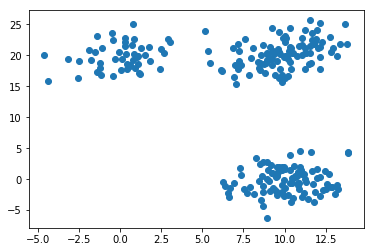

In [10]:
plt.scatter(x[:,0], x[:,1])
plt.show()

### 3. Find linkage matrix
#### Use ward as linkage metric and distance as Eucledian. 
#### From scipy.cluster.hierarchy import dendrogram, linkage
#### Generate the linkage matrix

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(x, 'ward', metric='euclidean')
Z.shape

(249, 4)

### 4. Plot the dendrogram for the consolidated dataframe

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [50.0, 50.0, 80.0, 80.0],
  [20.0, 20.0, 65.0, 65.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [182.5, 182.5, 212.5, 212.5],
  [143.75, 143.75, 197.5, 197.5],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [240.0, 240.0, 271.25, 271.25],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 375.0],
  [350.0, 350.0, 370.0, 370.0],
  [335.0, 335.0, 360.0, 360.0],


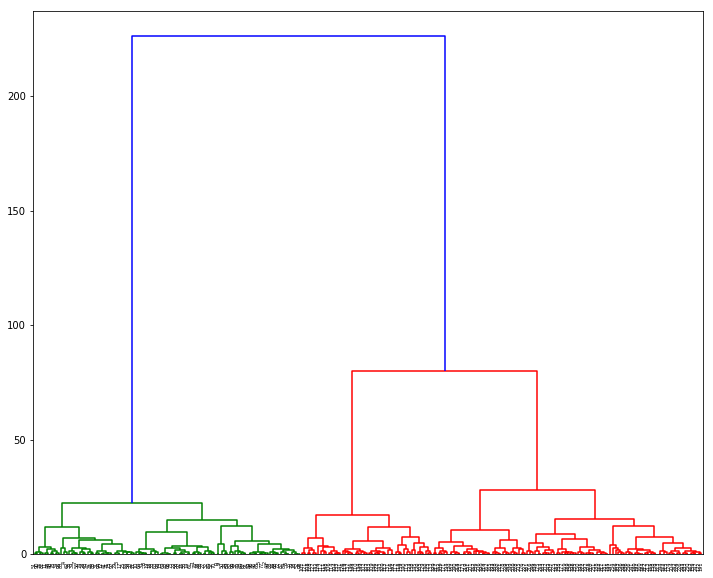

In [12]:
plt.figure(figsize=(12, 10))
dendrogram(Z)

### 5. Recreate the dendrogram for last 12 merged clusters
#### Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

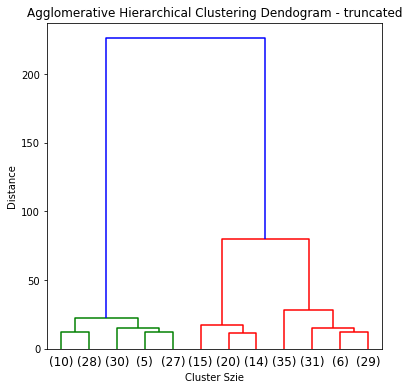

In [13]:
plt.figure(figsize=(6,6))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.title('Agglomerative Hierarchical Clustering Dendogram - truncated')
plt.xlabel('Cluster Szie')
plt.ylabel('Distance')
plt.show()

### 6.From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [15]:
opt_dist=50 ##50 was chosen as the optimal distance in this case because 
         ##any distance lower than that could result in too many points 
         ##values above 50 could result in reduction in the number of clusters and less clarity. 

### 7. Use distance measure and fcluster function to cluster the data into 3 different groups
#### Hint: From scipy.cluster.hierarchy Import fcluster and use criterion as "distance". Print clusters to view the clustered data

In [16]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, opt_dist, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### 8. Use matplotlib to visually observe the clusters

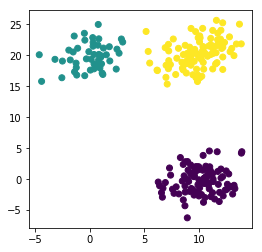

In [17]:
plt.figure(figsize=(4,4))
plt.scatter(x[:,0], x[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()